# Regresión Logística

Al igual que LDA, supondremos que el logodds es lineal. Por lo tanto:

$$logodss=\frac {P(Y=1|X)}{1-P(Y=1|X)}=X^T.\vec w + b$$

Si despejamos $P(Y=1|X)$ nos queda: 

$$P(Y=1|X)=\frac{1}{1+e^{-(X^T.\vec w + b)}}$$

En el caso de LDA $\vec w$ y $b$ estaban vinculados.

Ahora vamos a plantear un criterio distinto:

<img src="Regre.jpg">

Cada vez que le damos a la entrada un conjunto de predictores a un regresor logístico, este nos devuelve un valor entre 0 y 1 que es la probabilidad de que pertenezca a la clase positiva.

Dicho de otra manera, para cada observación, el regresor logístico modela $P(y_i=1|X_i)$.
Además, contamos con las salidas deseadas $d_i$ también llamadas anotaciones o labels. Si la salida deseada $d_i=1$, nos gustaría que el regresor nos dé una salida lo mas cercana a 1 posible:

$$ P(y_i=1|X_i) -> 1 $$  

Si la salida deseada $d_i=0$ nos gustaría que:

$$ P(y_i=0|X_i) = 1-P(y_i=1|X_i) -> 1 $$

En el caso de que las observaciones sean independientes, una medida de cuan bien está ajustado nuestro modelo a todas las observaciones es multiplicar todas las estimaciones de probabilidad correspondientes a la salida deseada y tratar de que sea máxima. Es decir, si por ejemplo nuestras salidas deseadas son: 1,1,0,1,0. Nos gustaría que:

$$\mathcal{L}=P(y_1=1|X_1).P(y_2=1|X_2).P(y_3=0|X_3).P(y_4=1|X_4).P(y_5=0|X_5)$$

Sea lo mas grande posible, es decir, que esté lo mas cercano a uno posible. Escrito de otra forma:

$$\mathcal{L}=P(y_1=1|X_1).P(y_2=1|X_2).\left(1-P(y_=1|X_3)\right).P(y_4=1|X_4).\left(1-P(y_5=1|X_5)\right) -> 1$$

Escrito formalmente para un caso mas genérico, deseamos maximizar:

$$\mathcal{L}=\frac{1}{N}\prod_{i=1}^N[P(y_i=1|X_i)^{d_i}.(1-P(y_i=1|X_i)^{1-d_i})]$$

Siendo que maximizar una productoria es algo complejo, podemos maximizar su logaritmo. Esto es lo mismo ya que el logaritmo es monótono creciente.

$$\mathcal{\log L}=\frac{1}{N}\sum_{i=1}^N[P(y_i=1|X_i).d_i+(1-P(y_i=1|X_i)).(1-d_i)]$$

La derivada de esta expresión es conocida. En vez de maximizar el $\mathcal{\log L}$ podemos minimizar $\mathcal{-\log L}$. Nótese que esta última expresión es equivalente a la entropía cruzada entre las anotaciones correspondientes $d_i$ (determinística, vale 1 o 0) y la probabilidad estimada $P(Y_i=1|X_i=x_i)$. Es decir, la función de costo mide cuánto se parece la distribución de nuestro modelo con respecto a la real de los datos.  
Para el caso particular de modelar con una $P(y_i=1|X_i)$ con una función sigmoidea $\frac{1}{1+e^{-(X^T.\vec w + b)}}$, la cross-entropy (xent) nos queda:

$$xent=\frac{1}{N}\sum_{i=1}^N[\frac{1}{1+e^{-(X^T.\vec w + b)}}.d_i+(1-\frac{1}{1+e^{-(X^T.\vec w + b)}}).(1-d_i)]$$

O bien:

$$xent=\frac{1}{N}\sum_{i=1}^N[\frac{1}{1+e^{-(X^T.\vec w + b)}}.d_i + \frac{1}{1+e^{X^T.\vec w + b}}.(1-d_i)]$$

Se puede demostrar que la cross-entropy, para el caso de la regresión logística, en una función convexa y derivable. Ello la hace una función interesante ya que tiene solo un mínimo absoluto y no tiene mínimos locales.

Esto hace posible que sea muy eficiente el uso de **optimizadores**.

<img src="sgd.gif">

Veamos un ejemplo de regresión logística con el tradicional problema de pesos y alturas.

$$
{\vec w}_{i+1} = {\vec w}_i - \nabla E_\text{in}({\vec w}_i)
$$

De esta manera, iterativamente podemos encontrar el mínimo de la función de costo. Ampliaremos sobre el tema optimizadores mas adelante.

https://blog.paperspace.com/intro-to-optimization-in-deep-learning-gradient-descent/

## Implementación de la regresión logística con sklearn

In [1]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
df = pd.read_csv('alturas-pesos.csv')
df["Sexo"]=(df["Sexo"]!="Hombre").astype(int)
df.head() #Para visualizar las primeras 5 observaciones

,Sexo,Peso,Altura
0,0,109,187
1,0,73,174
2,0,96,188
3,0,99,182
4,0,93,177


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=df[['Peso','Altura']].values
y=df['Sexo'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf=clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial')
clf.fit(X_train, y_train)
print(clf.predict(X_train[:2, :]))
print(y_train[:2])
print(clf.predict_proba(X_train[:2, :]))
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

[1 1]
[1 1]
[[0.02607122 0.97392878]
 [0.05453065 0.94546935]]
0.918955223880597
0.9209090909090909


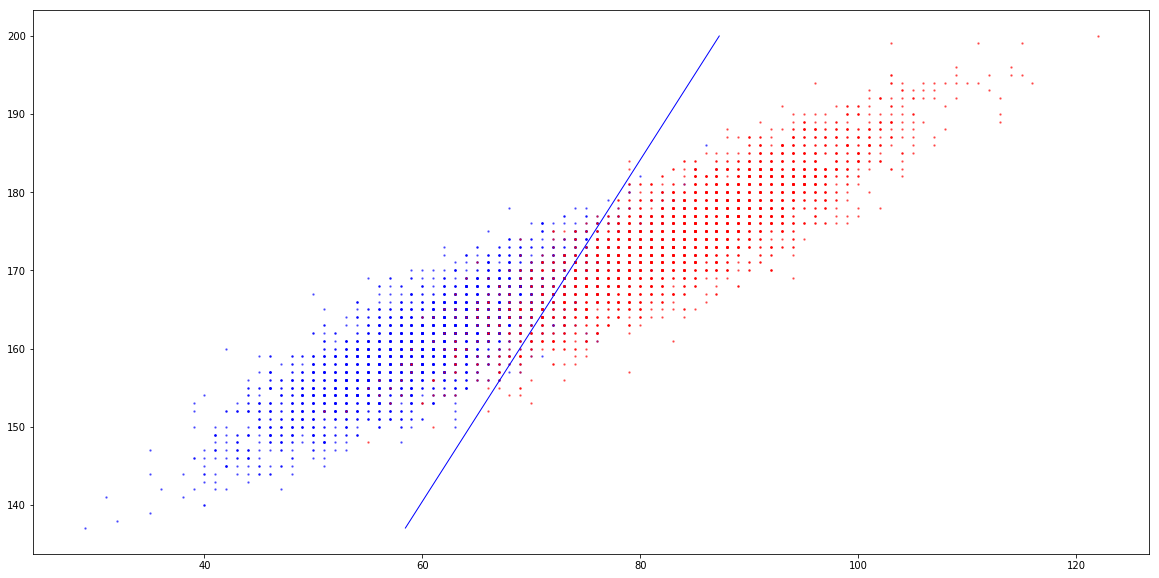

In [4]:
from helper import plotBoundary
plotBoundary(X_train, y_train,  clf, 50)

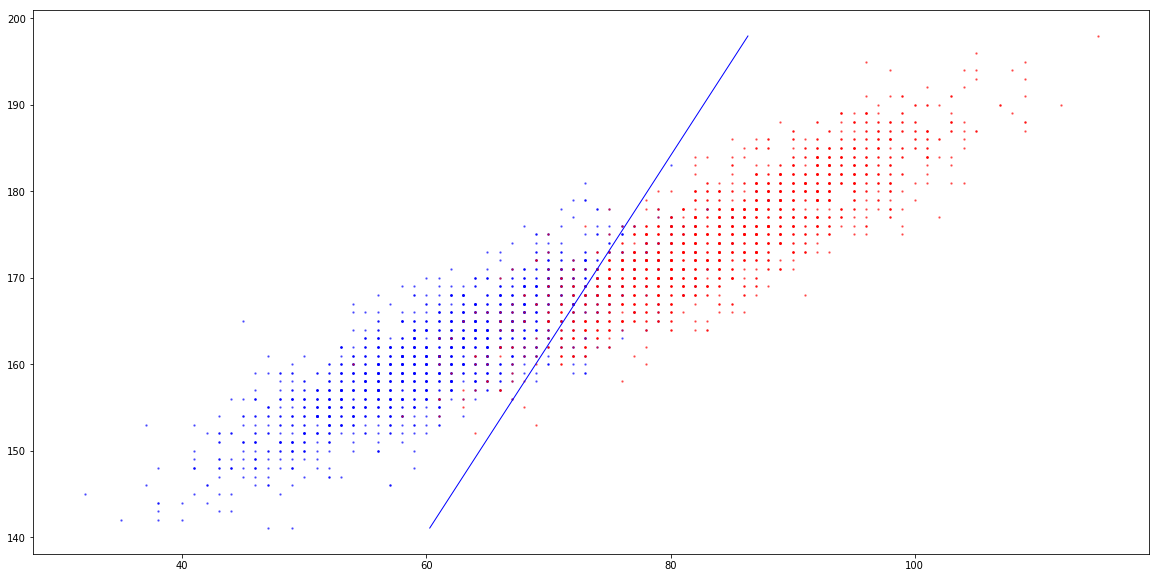

In [5]:
from helper import plotBoundary
plotBoundary(X_test, y_test,  clf, 50)

# Gráfica de la función de costo

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
w_saved=model.layers[1].get_weights()
weights=model.layers[1].get_weights()

fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')

# Make data.
omega0_v = np.arange(-50, 10, 1)
omega1_v = np.arange(-1, 0, 0.1)
omega0_var,omega1_var = np.meshgrid(omega0_v, omega1_v)
print(omega0_var.shape)
J=np.zeros(omega0_var.shape)
for i_o0,omega0 in enumerate(omega0_v):
    for i_o1,omega1 in enumerate(omega1_v):
        weights[0][0][0]=omega1
        #weights[0][1][0]=omega0
        weights[1][0]=omega0
        model.layers[1].set_weights(weights)
        J[i_o1,i_o0]=model.evaluate(X_train,y_train,verbose=0)[0]

#J=np.array(J)
#J=J.mean(axis=0)        
print(J.shape)
# Plot the surface.
surf = ax.plot_surface(omega0_var, omega1_var, J, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#ax.plot(history[0,:],history[1,:],history[2,:])
ax.set_xlabel('omega 0')
ax.set_ylabel('omega 1')
ax.set_title('Función de costo')
#ax.scatter([])
# Customize the z axis.
#ax.set_zlim(0, 1000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
# rotate the axes and update
#angle=0
#ax.view_init(30, angle)
#plt.draw()
#plt.pause(.001)
plt.show()
model.layers[1].set_weights(w_saved)